In [1]:
import os
import tensorflow as tf

train_dir = 'data3a/training'
val_dir = 'data3a/validation'

In [2]:
img_width, img_height = 150, 150
batch_size = 16

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1383 images belonging to 3 classes.
Found 248 images belonging to 3 classes.


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import ( 
    Dense, Dropout, Activation, Flatten,
    Conv2D, MaxPooling2D
)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(img_width, img_height, 3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [7]:
#model compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from tensorflow.keras.callbacks import CSVLogger

# Define the CSVLogger

log_folder = "traininglog"
log_file_path = f"{log_folder}/baselinecnn_training_log.csv"

csv_logger = CSVLogger(log_file_path, append=True)

In [9]:
#Model Train 
import time 
start_time = time.time()

set_epoch=50

# Train the model and pass the CSVLogger as a callback
history = model.fit(train_generator, epochs=set_epoch, validation_data=val_generator,callbacks=[csv_logger])

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Total training time: {elapsed_time:.2f} seconds")

Epoch 1/50
87/87 [==============================] - 25s 277ms/step - loss: 1.1311 - accuracy: 0.3174 - val_loss: 1.0980 - val_accuracy: 0.4073
Epoch 2/50
87/87 [==============================] - 23s 263ms/step - loss: 1.0915 - accuracy: 0.3709 - val_loss: 1.0712 - val_accuracy: 0.4153
Epoch 3/50
87/87 [==============================] - 23s 263ms/step - loss: 1.0918 - accuracy: 0.3644 - val_loss: 1.1153 - val_accuracy: 0.3831
Epoch 4/50
87/87 [==============================] - 23s 261ms/step - loss: 1.0625 - accuracy: 0.4396 - val_loss: 0.9977 - val_accuracy: 0.4677
Epoch 5/50
87/87 [==============================] - 23s 259ms/step - loss: 1.0040 - accuracy: 0.4837 - val_loss: 0.9215 - val_accuracy: 0.5645
Epoch 6/50
87/87 [==============================] - 23s 261ms/step - loss: 0.9869 - accuracy: 0.5040 - val_loss: 0.9162 - val_accuracy: 0.5484
Epoch 7/50
87/87 [==============================] - 23s 267ms/step - loss: 0.9610 - accuracy: 0.5271 - val_loss: 1.0642 - val_accuracy: 0.4718

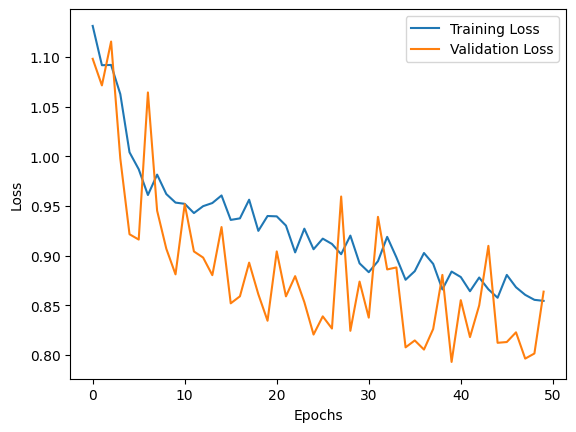

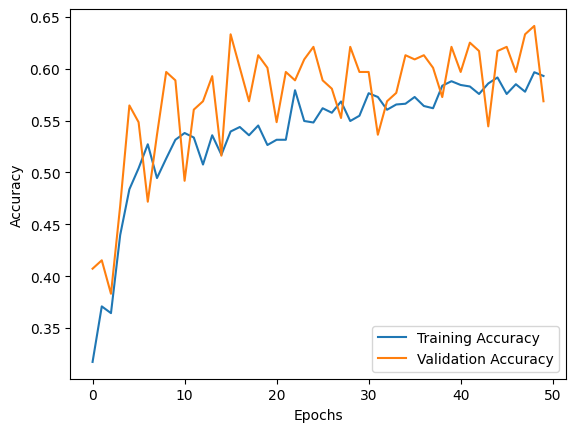

In [10]:
import matplotlib.pyplot as plt
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


8/8 [==============================] - 1s 87ms/step
Confusion Matrix:


C:\Users\sandi\AppData\Local\Temp\ipykernel_14948\897197665.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)#predicted
C:\Users\sandi\AppData\Local\Temp\ipykernel_14948\897197665.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])#actual


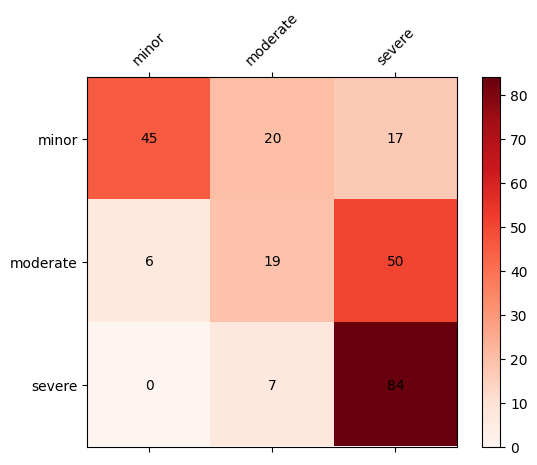

Classification Report:
              precision    recall  f1-score   support

    01-minor       0.88      0.55      0.68        82
 02-moderate       0.41      0.25      0.31        75
   03-severe       0.56      0.92      0.69        91

    accuracy                           0.60       248
   macro avg       0.62      0.58      0.56       248
weighted avg       0.62      0.60      0.57       248



In [10]:
import numpy as np

val_images, val_labels = [], []
class_names = sorted(train_generator.class_indices.keys())
for i in range(len(val_generator)):
    images, labels = val_generator[i]
    val_images.extend(images)
    val_labels.extend(np.argmax(labels, axis=1))


val_images = np.array(val_images)
val_labels = np.array(val_labels)

predictions = model.predict(val_images)


from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(predictions, axis=1)
y_true = val_labels

confusion_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap='Reds')

cbar = fig.colorbar(cax)

ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)#predicted
ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])#actual

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')
print('Confusion Matrix:')

plt.show()



report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification Report:')
print(report)

In [11]:
model.save('baselineCNN-model.keras')
print('model saved')

model saved


1/1 [==============================] - 0s 26ms/step


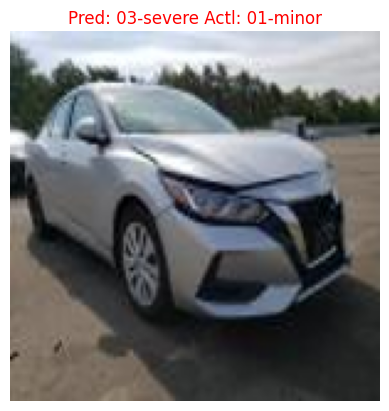

1/1 [==============================] - 0s 33ms/step


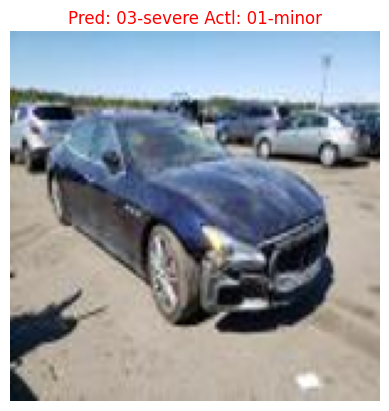

1/1 [==============================] - 0s 24ms/step


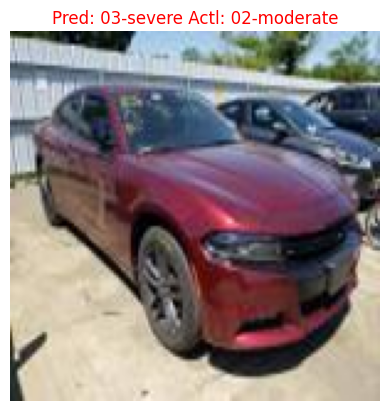

1/1 [==============================] - 0s 24ms/step


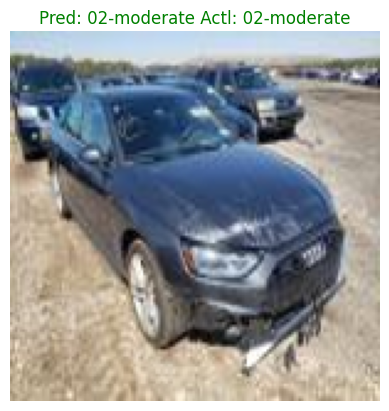

1/1 [==============================] - 0s 24ms/step


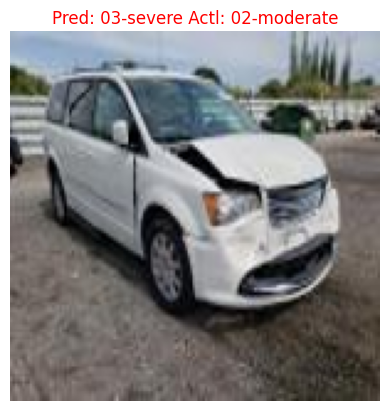

1/1 [==============================] - 0s 34ms/step


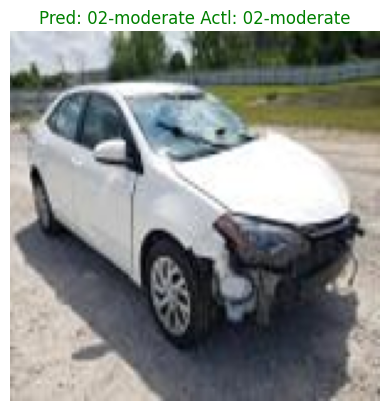

1/1 [==============================] - 0s 24ms/step


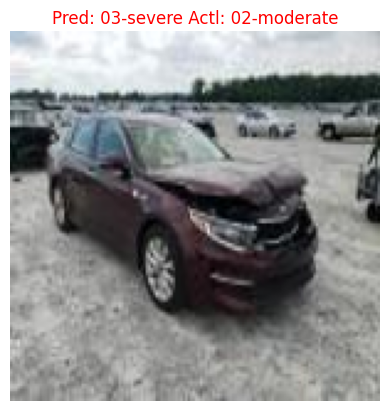

1/1 [==============================] - 0s 24ms/step


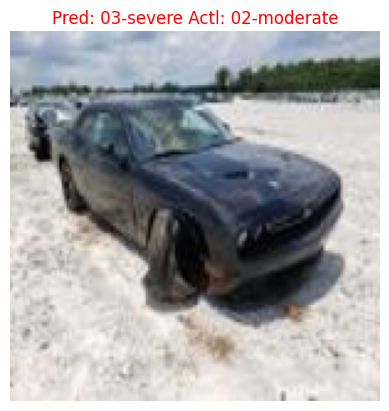

1/1 [==============================] - 0s 25ms/step


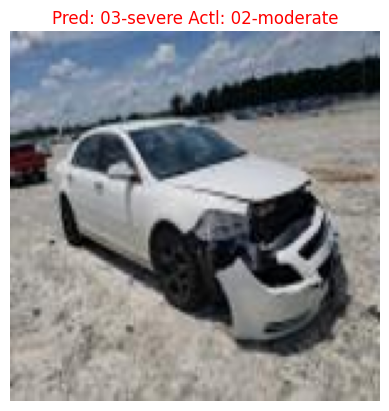

1/1 [==============================] - 0s 25ms/step


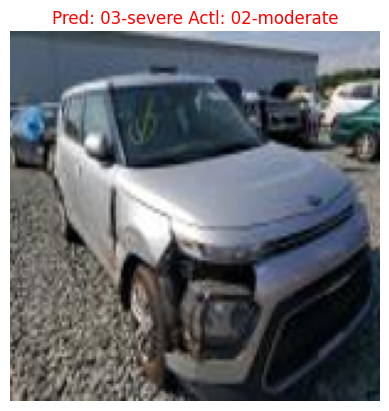

1/1 [==============================] - 0s 33ms/step


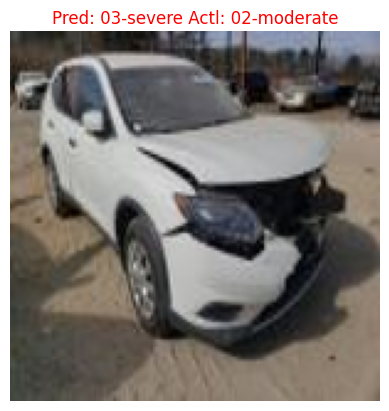

1/1 [==============================] - 0s 25ms/step


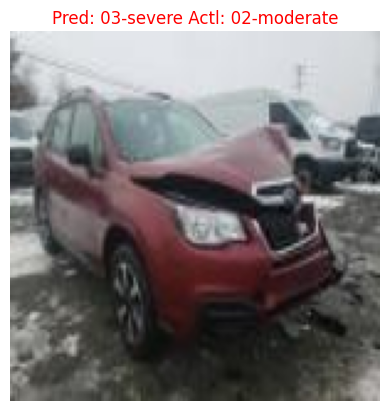

1/1 [==============================] - 0s 42ms/step


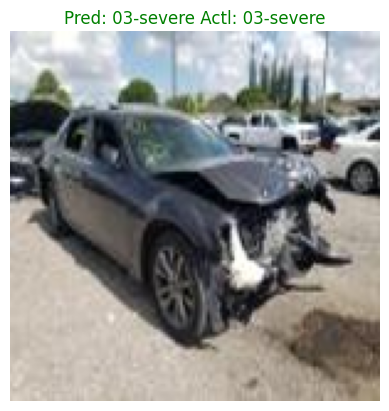

1/1 [==============================] - 0s 30ms/step


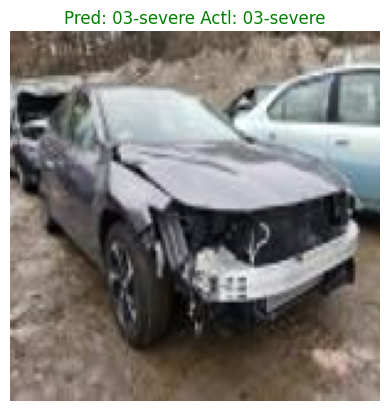

1/1 [==============================] - 0s 25ms/step


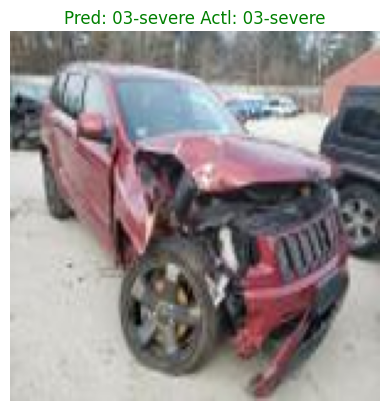

1/1 [==============================] - 0s 33ms/step


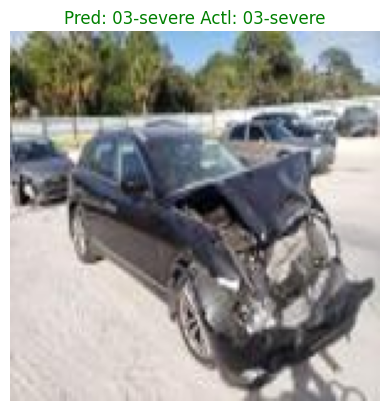

1/1 [==============================] - 0s 34ms/step


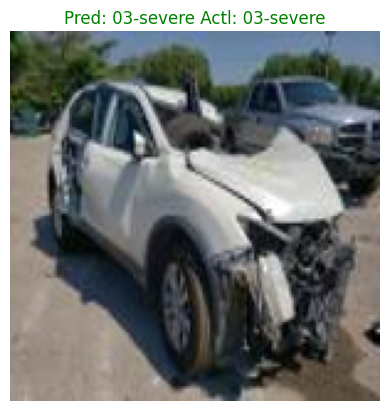

1/1 [==============================] - 0s 33ms/step


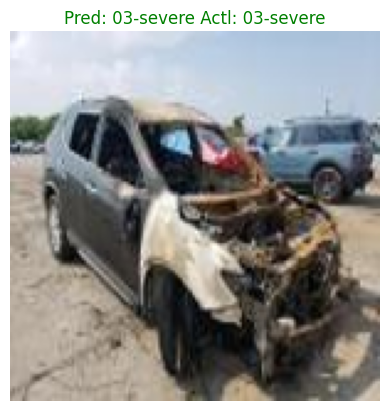

1/1 [==============================] - 0s 33ms/step


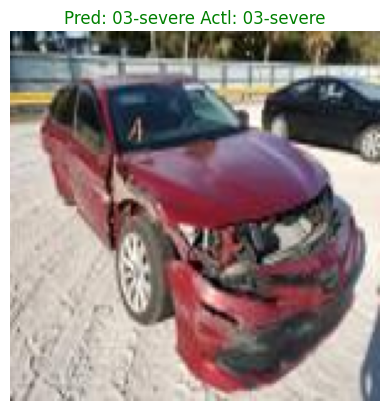

1/1 [==============================] - 0s 32ms/step


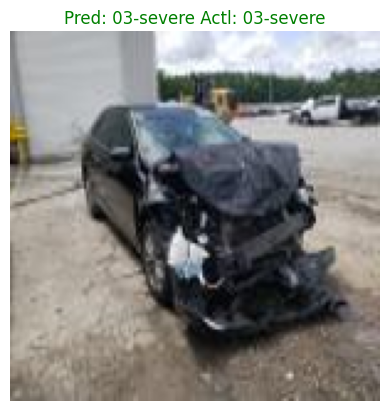

1/1 [==============================] - 0s 35ms/step


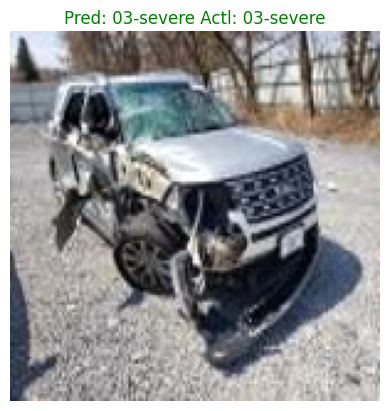

1/1 [==============================] - 0s 24ms/step


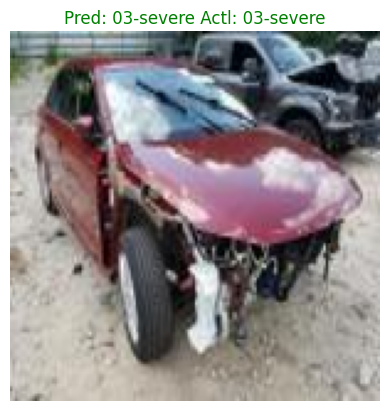

False: 10
True: 12


In [12]:
val_dir = 'data3a/validation'
class_names = ["01-minor", "02-moderate", "03-severe"]

image_paths = []
for class_name in class_names:
    folder_path = os.path.join(val_dir, class_name)
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths.append(os.path.join(folder_path, filename))
negative = 0
positive = 0
for image_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = img.resize((img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred_label = class_names[np.argmax(pred)]
    folder_name = os.path.basename(os.path.dirname(image_path))
    plt.imshow(img[0])
    if (pred_label != folder_name):
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'red')
        negative+=1
    else:
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'green')
        positive+=1
   
    plt.axis('off')
    plt.show() 
print('False: '+ str(negative) + '\nTrue: ' + str(positive))